The objective of this project is to perform classification of emotions in speech. This problem falls under audio classification. The dataset has been obtained from the following url: https://www.kaggle.com/ejlok1/toronto-emotional-speech-set-tess 
In this dataset we have two female speakers (old and young), who speak out sentences with diferent emotions

We are going to use Google Colab for this project as it facilitates the usage of free GPU.

In [0]:
#commenting the below 2 lines as it contains information related to my Google account
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
import zipfile
from zipfile import ZipFile
import pandas as pd
import numpy as np
import os, shutil
from math import ceil, floor
from IPython.display import display, Audio
from PIL import Image
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [0]:
def unzip_files(zipFilePath, unzip_directory):
    zipFile = ZipFile(zipFilePath, 'r')
    zipFile.extractall(unzip_directory)
    zipFile.close()

In [0]:
unzip_files('drive/My Drive/datasets/speech_emotion_recognition/TESS_Toronto_emotional_speech_set_data.zip', 'Unzipped_speech_recognition_data')

In [5]:
os.listdir('Unzipped_speech_recognition_data')

['TESS Toronto emotional speech set data']

In [6]:
os.listdir('Unzipped_speech_recognition_data/TESS Toronto emotional speech set data')

['YAF_sad',
 'OAF_disgust',
 'OAF_Fear',
 'YAF_fear',
 'YAF_neutral',
 'OAF_angry',
 'YAF_happy',
 'OAF_neutral',
 'OAF_Sad',
 'YAF_angry',
 'OAF_happy',
 'YAF_disgust',
 'YAF_pleasant_surprised',
 'OAF_Pleasant_surprise']

In [0]:
#there are total 7 emotions and let us store the values in the list, which will be helpful later
emotions = ['sad', 'angry', 'fear', 'disgust', 'happy', 'neutral', 'pleasant_surprise']

we have two female actresses, old and young, denoted with folders starting with OAF and YAF respectively. Let us check the number of files in each folder

In [8]:
for cur_folder in os.listdir('Unzipped_speech_recognition_data/TESS Toronto emotional speech set data'):
  print('current folder', cur_folder)
  print('number of files', len(os.listdir('Unzipped_speech_recognition_data/TESS Toronto emotional speech set data/' + cur_folder)))

current folder YAF_sad
number of files 200
current folder OAF_disgust
number of files 200
current folder OAF_Fear
number of files 200
current folder YAF_fear
number of files 200
current folder YAF_neutral
number of files 200
current folder OAF_angry
number of files 200
current folder YAF_happy
number of files 200
current folder OAF_neutral
number of files 200
current folder OAF_Sad
number of files 200
current folder YAF_angry
number of files 200
current folder OAF_happy
number of files 200
current folder YAF_disgust
number of files 200
current folder YAF_pleasant_surprised
number of files 200
current folder OAF_Pleasant_surprise
number of files 200


Now we are going to merge the old female and young female's audio clips in folders for all the emotions

In [0]:
os.mkdir('emotions_dataset_combined')
for emotion in emotions:
  os.mkdir('emotions_dataset_combined/' + emotion)

In [0]:
def move_audio_files(base_src, base_dst):

  for cur_folder in os.listdir(base_src):
    cur_emotion = cur_folder.lower().split('_')[1]
    if cur_emotion == 'pleasant':
      cur_emotion = 'pleasant_surprise'
  
    print('current emotion', cur_emotion)
    cur_audios = os.listdir(base_src + '/' + cur_folder)
    num_of_audios = len(cur_audios)
    print('number of audios', num_of_audios)
    for i in range(0, num_of_audios):
      cur_audio = cur_audios[i]
      src = base_src + '/' + cur_folder + '/' + cur_audio
      dst = base_dst + '/' + cur_emotion + '/' + cur_audio
      shutil.move(src, dst)

In [11]:
move_audio_files('Unzipped_speech_recognition_data/TESS Toronto emotional speech set data', 'emotions_dataset_combined')

current emotion sad
number of audios 200
current emotion disgust
number of audios 200
current emotion fear
number of audios 200
current emotion fear
number of audios 200
current emotion neutral
number of audios 200
current emotion angry
number of audios 200
current emotion happy
number of audios 200
current emotion neutral
number of audios 200
current emotion sad
number of audios 200
current emotion angry
number of audios 200
current emotion happy
number of audios 200
current emotion disgust
number of audios 200
current emotion pleasant_surprise
number of audios 200
current emotion pleasant_surprise
number of audios 200


In [12]:
for cur_folder in os.listdir('emotions_dataset_combined'):
  print('current folder', cur_folder)
  print('number of files', len(os.listdir('emotions_dataset_combined' + '/' + cur_folder)))

current folder disgust
number of files 400
current folder sad
number of files 400
current folder neutral
number of files 400
current folder pleasant_surprise
number of files 400
current folder angry
number of files 400
current folder happy
number of files 400
current folder fear
number of files 400


Now let us check the maximum duration of audio files

In [0]:
max_duration = 0
total_duration = 0
num_of_files = 2800

In [0]:
for cur_folder in os.listdir('emotions_dataset_combined'):
  cur_files = os.listdir('emotions_dataset_combined' + '/' + cur_folder)
  for cur_file in cur_files:
    cur_file_path = 'emotions_dataset_combined' + '/' + cur_folder + '/' + cur_file
    duration = librosa.get_duration(filename=cur_file_path)
    total_duration += duration
    if duration > max_duration:
      max_duration = duration

print('total duration is {} seconds'.format(total_duration))
print('average duration is {} seconds'.format(total_duration/num_of_files))
print('max duration is {} seconds'.format(max_duration))

total duration is 5754.351726642491 seconds
average duration is 2.0551256166580325 seconds
max duration is 2.9848038010977307 seconds


In [0]:
for cur_emotion in emotions:
  print('current emotion {}'.format(cur_emotion))
  base_dir = 'emotions_dataset_combined/' + cur_emotion
  audio_file = os.listdir(base_dir)[0]
  display(Audio(base_dir+'/'+audio_file))

current emotion sad


current emotion angry


current emotion fear


current emotion disgust


current emotion happy


current emotion neutral


current emotion pleasant_surprise


We will be using the librosa python package for audio analysis

We will take one audio file from each genre and start by plotting it's monophonic waveform

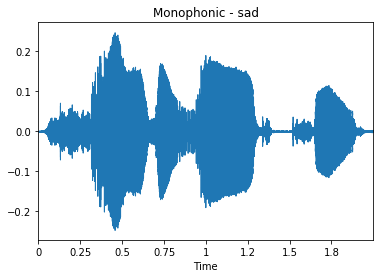

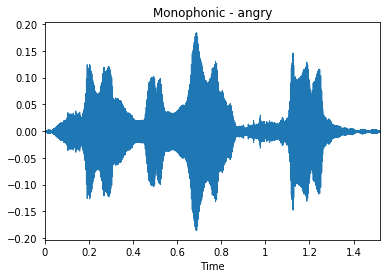

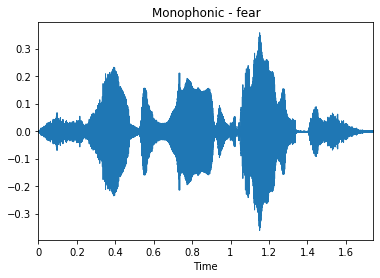

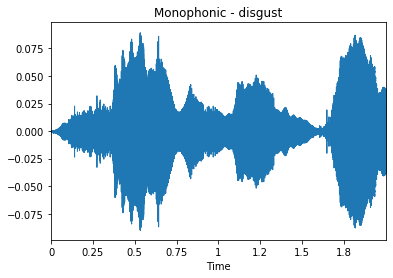

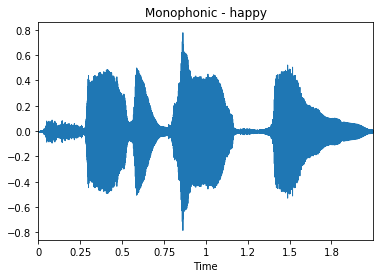

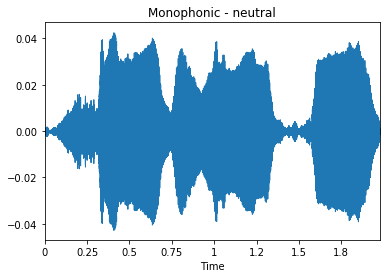

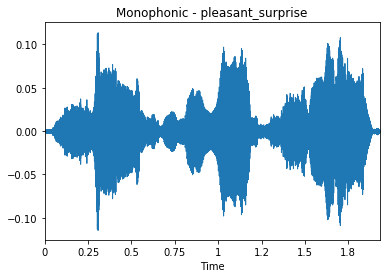

In [0]:
for cur_emotion in emotions:
  base_dir = 'emotions_dataset_combined/' + cur_emotion
  audio_file = os.listdir(base_dir)[0]
  y, sr = librosa.load(base_dir + '/' + audio_file, duration=2)
  plt.figure()
  librosa.display.waveplot(y, sr=sr)
  plt.title('Monophonic - ' + cur_emotion)

Now, We will take one audio file from each genre and plot the mel scaled spectrogram

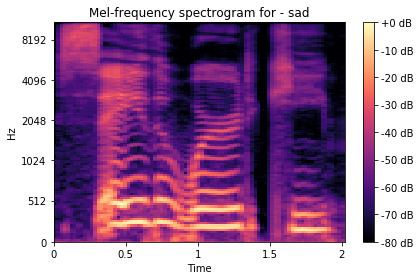

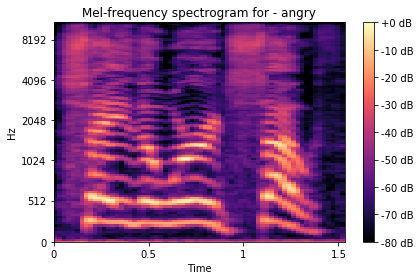

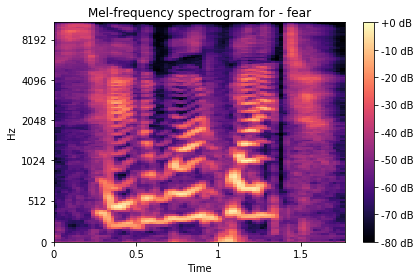

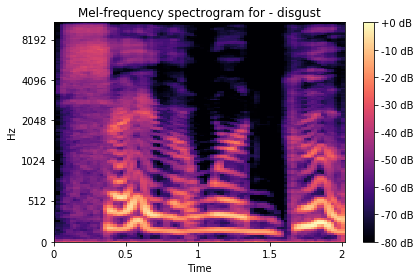

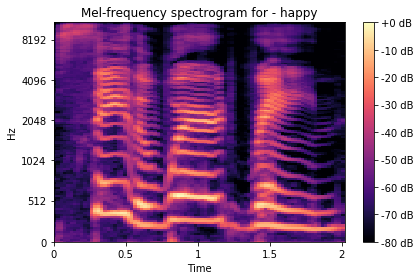

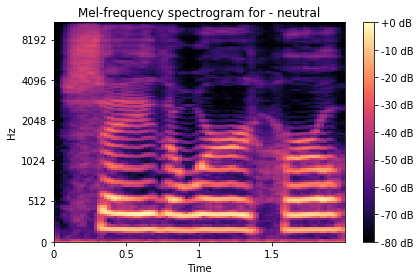

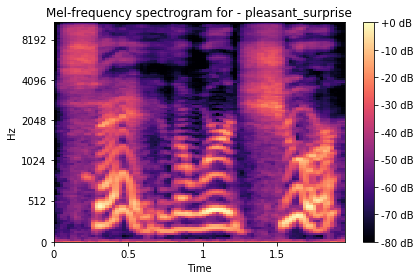

In [0]:
for cur_emotion in emotions:
  base_dir = 'emotions_dataset_combined/' + cur_emotion
  audio_file = os.listdir(base_dir)[0]
  y, sr = librosa.load(base_dir + '/' + audio_file, duration=2)
  S = librosa.feature.melspectrogram(y=y, sr=sr)
  S_dB = librosa.power_to_db(S, ref=np.max)
  plt.figure()
  librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
  plt.colorbar(format='%+2.0f dB')
  plt.title('Mel-frequency spectrogram for - ' + cur_emotion)
  plt.tight_layout()

Now we are going to generate the mel scaled spectrogram plots for all the audio files and save them as images. Then we are going to use these images for emotion classification

In [0]:
os.mkdir('mel_scaled_spectrogram_imgs')
for cur_emotion in emotions:
  os.mkdir('mel_scaled_spectrogram_imgs/'+cur_emotion)

In [0]:
def generate_mel_spectrogram_imgs():
  for cur_emotion in emotions:
    base_dir = 'emotions_dataset_combined/' + cur_emotion
    audio_files = os.listdir(base_dir)
    for cur_audio_file in audio_files:
      y, sr = librosa.load(base_dir + '/' + cur_audio_file, duration=2)
      S = librosa.feature.melspectrogram(y=y, sr=sr)
      S_dB = librosa.power_to_db(S, ref=np.max)
      fig = plt.figure(figsize=(8,5))
      ax = plt.axes()
      ax.set_axis_off()
      librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
      img_name = cur_audio_file.split('.wav')[0] + '.png'
      img_path = 'mel_scaled_spectrogram_imgs/' + cur_emotion + '/' + img_name
      plt.savefig(img_path, bbox_inches='tight', transparent=True, pad_inches=0.0 )
      plt.close(fig)

In [0]:
generate_mel_spectrogram_imgs()

In [0]:
def display_sample_imgs(path):
  for cur_emotion in emotions:
    print('current emotion:', cur_emotion)
    cur_emotion_dir = path + cur_emotion
    cur_imgs = os.listdir(cur_emotion_dir)[:4]
    canvas_sheet_width = 1184
    canvas_sheet_height = 320
    canvas_sheet = Image.new('RGB', (canvas_sheet_width, canvas_sheet_height))
    x = 32
    for cur_img in cur_imgs:
      img = Image.open(cur_emotion_dir + '/' + cur_img)
      img = img.resize((256,256))
      canvas_sheet.paste(img, (x, 32))
      x += 256 + 32
    display(canvas_sheet)

current emotion: sad


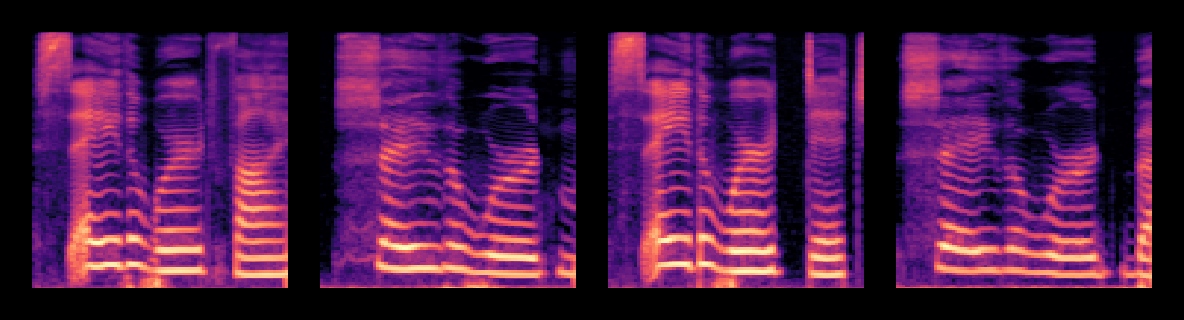

current emotion: angry


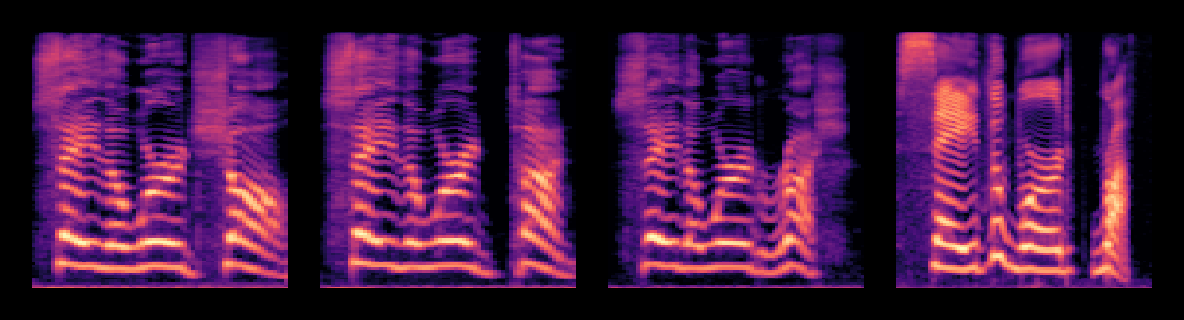

current emotion: fear


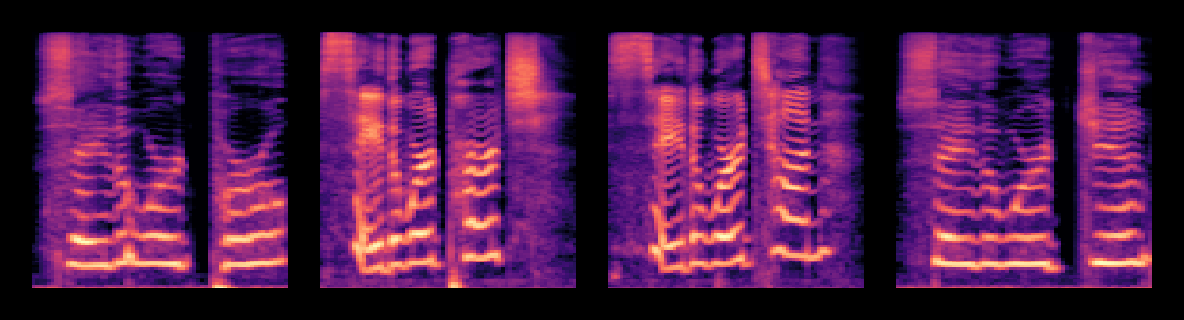

current emotion: disgust


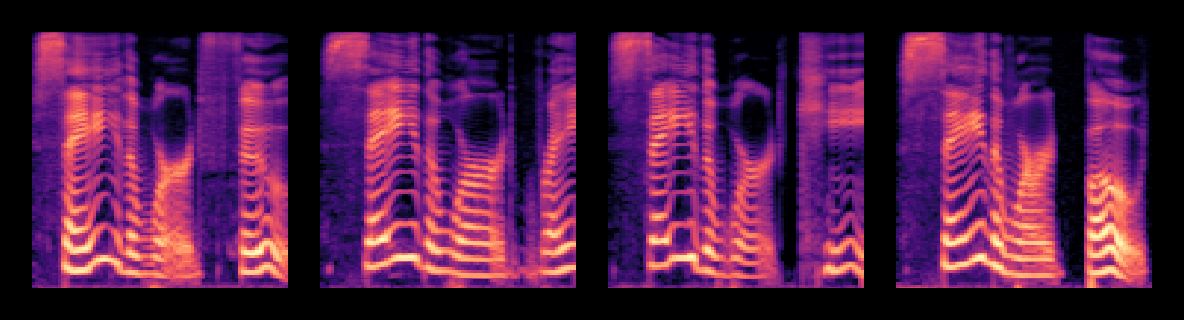

current emotion: happy


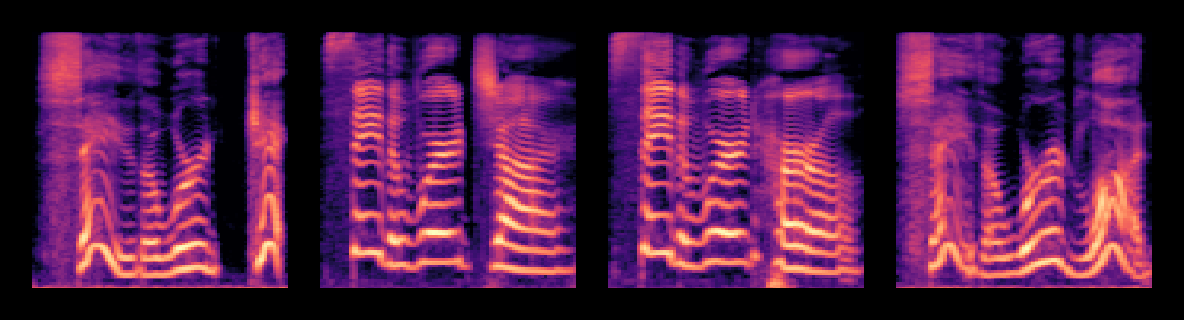

current emotion: neutral


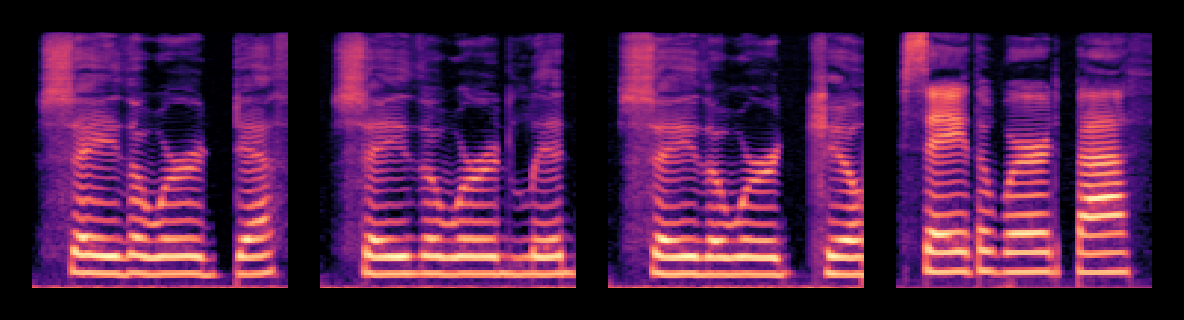

current emotion: pleasant_surprise


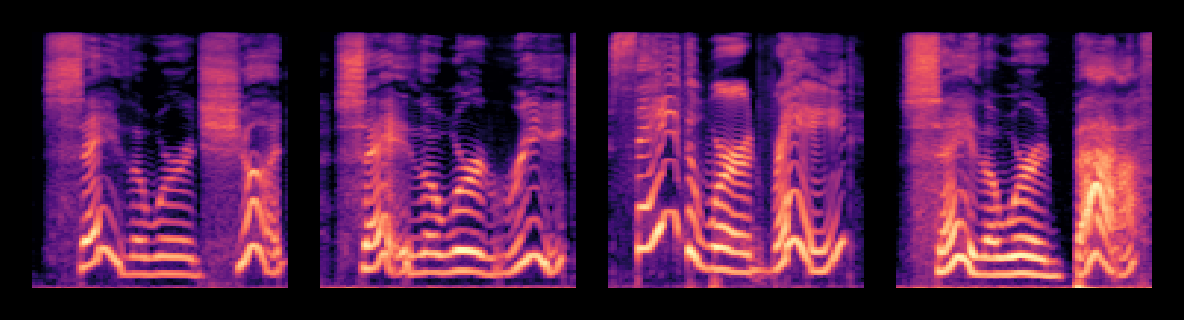

In [17]:
display_sample_imgs('mel_scaled_spectrogram_imgs/')

we are going to break the overall dataset into 3 sets. Training (80%), validation (10%) and testing (10%). In each of these folders, create folders for all the genres

In [0]:
assessment_dirs = ['TRAIN', 'TEST', 'VAL']
for cur_dir in assessment_dirs:
  os.mkdir(cur_dir)
  for cur_emotion in emotions:
    os.mkdir(cur_dir + '/' + cur_emotion)

In [0]:
def move_files(base_src, base_dst, steps=1):
  for cur_emotion in emotions:
    print('current emotion', cur_emotion)
    cur_imgs = os.listdir(base_src + '/' + cur_emotion)
    num_of_imgs = len(cur_imgs)
    print('number of images', num_of_imgs)
    for i in range(0, num_of_imgs, steps):
      cur_img = cur_imgs[i]
      src = base_src + '/' + cur_emotion + '/' + cur_img
      dst = base_dst + '/' + cur_emotion + '/' + cur_img
      shutil.move(src, dst)

In [20]:
move_files('mel_scaled_spectrogram_imgs', 'TEST', 10)

current emotion sad
number of images 400
current emotion angry
number of images 400
current emotion fear
number of images 400
current emotion disgust
number of images 400
current emotion happy
number of images 400
current emotion neutral
number of images 400
current emotion pleasant_surprise
number of images 400


In [21]:
move_files('mel_scaled_spectrogram_imgs', 'VAL', 9)

current emotion sad
number of images 360
current emotion angry
number of images 360
current emotion fear
number of images 360
current emotion disgust
number of images 360
current emotion happy
number of images 360
current emotion neutral
number of images 360
current emotion pleasant_surprise
number of images 360


In [22]:
move_files('mel_scaled_spectrogram_imgs', 'TRAIN')

current emotion sad
number of images 320
current emotion angry
number of images 320
current emotion fear
number of images 320
current emotion disgust
number of images 320
current emotion happy
number of images 320
current emotion neutral
number of images 320
current emotion pleasant_surprise
number of images 320


Let us check the number of images in each genre in the assessment directories (train, test and val)

In [23]:
for cur_assessment_dir in assessment_dirs:
  print('current assessment directory', cur_assessment_dir)
  for cur_emotion in emotions:
    print('current emotion', cur_emotion)
    print('number of images', len(os.listdir(cur_assessment_dir + '/' + cur_emotion)))
  print('=============================================')

current assessment directory TRAIN
current emotion sad
number of images 320
current emotion angry
number of images 320
current emotion fear
number of images 320
current emotion disgust
number of images 320
current emotion happy
number of images 320
current emotion neutral
number of images 320
current emotion pleasant_surprise
number of images 320
current assessment directory TEST
current emotion sad
number of images 40
current emotion angry
number of images 40
current emotion fear
number of images 40
current emotion disgust
number of images 40
current emotion happy
number of images 40
current emotion neutral
number of images 40
current emotion pleasant_surprise
number of images 40
current assessment directory VAL
current emotion sad
number of images 40
current emotion angry
number of images 40
current emotion fear
number of images 40
current emotion disgust
number of images 40
current emotion happy
number of images 40
current emotion neutral
number of images 40
current emotion pleasant

In [24]:
total_train_imgs = 0
total_test_imgs = 0
total_val_imgs = 0
for cur_dir in assessment_dirs:
    for cur_emotion in emotions:
        num_of_imgs = len(os.listdir(cur_dir + '/' + cur_emotion))
        if cur_dir == 'TRAIN':
            total_train_imgs += num_of_imgs
        elif cur_dir == 'TEST':
            total_test_imgs += num_of_imgs
        else:
            total_val_imgs += num_of_imgs
            
print('total training images', total_train_imgs)
print('total test images', total_test_imgs)
print('total val images', total_val_imgs)

total training images 2240
total test images 280
total val images 280


In [25]:
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
train_dir = 'TRAIN'
val_dir = 'VAL'
test_dir = 'TEST'

In [28]:
batch_size = 32
steps_per_epoch = floor(total_train_imgs/batch_size)
validation_steps = floor(total_val_imgs/batch_size)
test_steps = floor(total_test_imgs/batch_size)
print('steps_per_epoch', steps_per_epoch)
print('validation_steps', validation_steps)
print('test_steps', test_steps)

steps_per_epoch 70
validation_steps 8
test_steps 8


In [0]:
def get_train_datagen():
  return ImageDataGenerator(rescale=1.0/255)
  
def get_val_datagen():
  return ImageDataGenerator(rescale=1.0/255)
  
def get_test_datagen():
  return ImageDataGenerator(rescale=1.0/255)

In [0]:
def handle_model_fit_gen(model, num_epochs, train_generator, validation_generator):
  
  history_data = model.fit_generator(
      train_generator, 
      steps_per_epoch=steps_per_epoch, 
      epochs=num_epochs, 
      validation_data=validation_generator, 
      validation_steps=validation_steps)
  return history_data

In [0]:
import seaborn as sns

def create_line_charts(df, title, xlabel, ylabel):
  ax = sns.lineplot(data=df)
  ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
  
def create_acc_df(history_data, num_epochs):
  epochs_val = list(range(1, num_epochs+1))
  acc_val = history_data.history['acc']
  validation_acc_val = history_data.history['val_acc']
  acc_dict = {
      'epochs':epochs_val,
      'train_acc':acc_val,
      'val_acc':validation_acc_val
  }
  acc_df = pd.DataFrame(acc_dict)
  acc_df.set_index('epochs', inplace=True)
  return acc_df

def create_loss_df(history_data, num_epochs):
  epochs_val = list(range(1, num_epochs+1))
  loss_val = history_data.history['loss']
  validation_loss_val = history_data.history['val_loss']
  loss_dict = {
      'epochs':epochs_val,
      'train_loss':loss_val,
      'val_loss':validation_loss_val
  }
  loss_df = pd.DataFrame(loss_dict)
  loss_df.set_index('epochs', inplace=True)
  return loss_df

In [0]:
from keras.applications import VGG19

In [0]:
def get_VGG19_Conv_Base(input_shape):
  return VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

In [34]:
conv_base1 = get_VGG19_Conv_Base((224,224,3))





80142336/80134624 [==============================] - 2s 0us/step








In [35]:
conv_base1.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [36]:
custom_model1 = models.Sequential()
custom_model1.add(conv_base1)
custom_model1.add(layers.Flatten())
custom_model1.add(layers.Dropout(rate=0.3))
custom_model1.add(layers.Dense(512, activation='relu'))
custom_model1.add(layers.Dropout(rate=0.4))
custom_model1.add(layers.Dense(7, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [37]:
custom_model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 3591      
Total params: 32,873,543
Trainable params: 32,873,543
Non-trainable params: 0
__________________________________________

In [38]:
print('number of trainable weights before freezing the conv base', len(custom_model1.trainable_weights))
conv_base1.trainable = False
print('number of trainable weights after freezing the conv base', len(custom_model1.trainable_weights))

number of trainable weights before freezing the conv base 36
number of trainable weights after freezing the conv base 4


In [39]:
custom_model1.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=2e-5), metrics=['accuracy'])

In [40]:
train_datagen1 = get_train_datagen()
validation_datagen1 = get_val_datagen()
test_datagen1 = get_test_datagen()

train_generator1 = train_datagen1.flow_from_directory(train_dir, target_size=(224,224), batch_size=batch_size, class_mode='categorical')
validation_generator1 = validation_datagen1.flow_from_directory(val_dir, target_size=(224,224), batch_size=batch_size, class_mode='categorical')

Found 2240 images belonging to 7 classes.
Found 280 images belonging to 7 classes.


In [41]:
model_history_data1 = handle_model_fit_gen(custom_model1, 35, train_generator1, validation_generator1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/35
70/70 [==============================] - 15s 217ms/step - loss: 1.5676 - acc: 0.4179 - val_loss: 0.6434 - val_acc: 0.9336
Epoch 2/35
70/70 [==============================] - 11s 152ms/step - loss: 0.6492 - acc: 0.8071 - val_loss: 0.2357 - val_acc: 0.9718
Epoch 3/35
70/70 [==============================] - 10s 146ms/step - loss: 0.3453 - acc: 0.9058 - val_loss: 0.1079 - val_acc: 1.0000
Epoch 4/35
70/70 [==============================] - 10s 145ms/step - loss: 0.2158 - acc: 0.9527 - val_loss: 0.0716 - val_acc: 1.0000
Epoch 5/35
70/70 [==============================] - 10s 143ms/step - loss: 0.1470 - acc: 0.9683 - val_loss: 0.0510 - val_acc: 1.0000
Epoch 6/35
70/70 [==============================] - 10s 145ms/step - loss: 0.1129 - acc: 0.9741 - val_loss: 0.0356 - val_acc: 1.0000
Epoch 7/35
70/70 [==============================] - 10s 143ms/step - loss: 0.0891 - acc: 0.9853 - val_loss

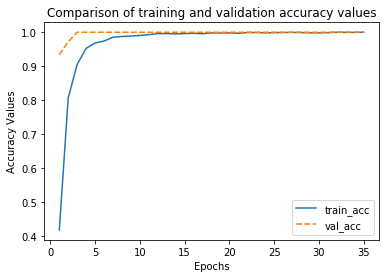

In [42]:
create_line_charts(create_acc_df(model_history_data1, 35), 'Comparison of training and validation accuracy values', 'Epochs', 'Accuracy Values')

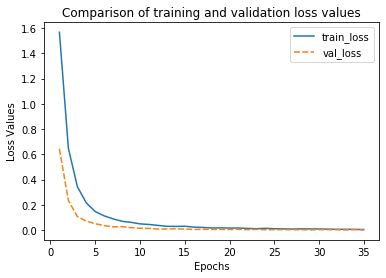

In [43]:
create_line_charts(create_loss_df(model_history_data1, 35), 'Comparison of training and validation loss values', 'Epochs', 'Loss Values')

In [44]:
test_generator1 = test_datagen1.flow_from_directory(test_dir, target_size=(224,224), batch_size=batch_size, class_mode='categorical')
test_loss1, test_accuracy1 = custom_model1.evaluate_generator(test_generator1, steps=test_steps)
print('test_loss', test_loss1)
print('test_accuracy', test_accuracy1)

Found 280 images belonging to 7 classes.
test_loss 0.006192006410856266
test_accuracy 0.99609375
